# 3장 신경망 시작하기

### 예제
- 이진 분류: 영화 리뷰 긍정 또는 부정으로 분류하기
- 다중 분류: 신문 기사를 토픽으로 분류하기
- 회귀: 부동산 데이터를 바탕으로 주택 가격을 예측하기

# 이진 분류

In [1]:
# 3-1 IMDB 데이터셋 로드하기
from keras.datasets import imdb
(train_data, train_label),(test_data,test_label) = imdb.load_data(num_words = 10000) # 가장 많이 나타나는 단어의 개수 1만개만 사용하겠습니다

17465344/17464789 [==============================] - 1s 0us/step


In [2]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [3]:
# 단어 인덱스는 1만개를 넘지 않는다.
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i  - 3, '?') for i in train_data[0]]
)

1646592/1641221 [==============================] - 0s 0us/step


In [5]:
# 3-2 정수 시퀀스를 이진 행렬로 인코딩하기 (벡터화)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
display(x_train[0])
display(x_train.shape)

array([0., 1., 1., ..., 0., 0., 0.])

(25000, 10000)

In [7]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [8]:
# 3-3 모델 정의하기
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일
1. 옵티마이저의 클래스를 이용하는 방법
2. 함수 객체를 만들어 매개변수로 전달

In [10]:
# 3-4 모델 컴파일하기
# 클래스를 이용하는 방법
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# 3-5 옵티마이저 설정하기  
# 옵티마이저의 매개변수를 바꾸거나 자신만의 손실 함수, 측정 함수를 전달해야 할 경우에 사용
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# 3-6 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_crossentropy])

### 훈련 검증

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [14]:
# 3-8 모델 훈련하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=20,validation_data=(x_val,y_val))

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3441 - acc: 0.8569 - val_loss: 0.2710 - val_acc: 0.8905
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2076 - acc: 0.9198 - val_loss: 0.2820 - val_acc: 0.8887
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1674 - acc: 0.9392 - val_loss: 0.3099 - val_acc: 0.8864
Epoch 4/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1431 - acc: 0.9487 - val_loss: 0.3389 - val_acc: 0.8851
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1247 - acc: 0.9539 - val_loss: 0.3536 - val_acc: 0.8827
Epoch 6/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1087 - acc: 0.9616 - val_loss: 0.3968 - val_acc: 0.8782
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0949 - acc: 0.9673 - val_loss: 0.4315 - val_acc: 0.8795
Epoch 8/20
750/750 [==============================] - 4s 5ms/step - loss: 0.

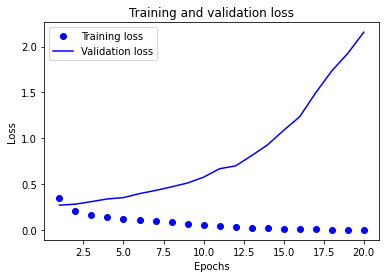

In [15]:
# 3-9 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt
history_dict = history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

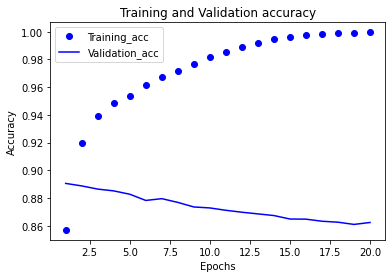

In [16]:
#3-10
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training_acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 26ms/step - loss: 0.4866 - acc: 0.7953
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2694 - acc: 0.9059
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2046 - acc: 0.9295
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2962 - acc: 0.8820


In [22]:
model.predict(x_test)

array([[0.14701188],
       [0.99992687],
       [0.8132283 ],
       ...,
       [0.09189531],
       [0.06577224],
       [0.5079659 ]], dtype=float32)

### 추가실험

In [25]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(64,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=312,validation_data=(x_val,y_val))

Epoch 1/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1451 - acc: 0.8053 - val_loss: 0.0900 - val_acc: 0.8845
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0649 - acc: 0.9187 - val_loss: 0.0881 - val_acc: 0.8813
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0447 - acc: 0.9433 - val_loss: 0.0930 - val_acc: 0.8760
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0329 - acc: 0.9601 - val_loss: 0.1015 - val_acc: 0.8693
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0235 - acc: 0.9721 - val_loss: 0.1043 - val_acc: 0.8689
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0160 - acc: 0.9821 - val_loss: 0.0992 - val_acc: 0.8760
Epoch 7/20
49/49 [==============================] - 1s 27ms/step - loss: 0.0109 - acc: 0.9882 - val_loss: 0.1031 - val_acc: 0.8751
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0088 - a

In [27]:
import pandas as pd
pd.DataFrame(history_dict)

,loss,acc,val_loss,val_acc
0,0.344053,0.856933,0.271039,0.8905
1,0.207637,0.919800,0.282008,0.8887
2,0.167441,0.939200,0.309912,0.8864
3,0.143068,0.948733,0.338905,0.8851
4,0.124725,0.953867,0.353599,0.8827
5,0.108700,0.961600,0.396793,0.8782
6,0.094879,0.967333,0.431512,0.8795
7,0.083115,0.971867,0.470742,0.8768
8,0.069883,0.977000,0.512799,0.8735
9,0.057256,0.981667,0.576013,0.8728


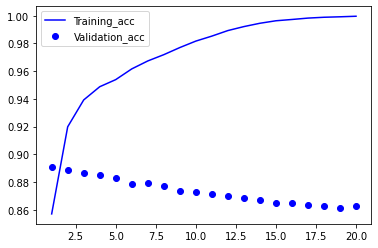

In [28]:
plt.clf()
acc=history_dict['acc']
val_caa = history_dict['val_acc']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='Training_acc')
plt.plot(epochs,val_acc,'bo',label='Validation_acc')
plt.legend()
plt.show()

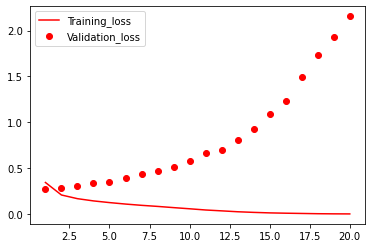

In [30]:
plt.clf()
loss = history_dict['loss']
val_loss=history_dict['val_loss']
plt.plot(epochs,loss,'r',label='Training_loss')
plt.plot(epochs,val_loss,'ro',label='Validation_loss')
plt.legend()
plt.show()

# 다중 분류

In [32]:
# 3-12 로이터 데이터셋 준비하기
from keras.datasets import reuters

(train_data,train_label),(test_data,test_label) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))

8982
2246


In [38]:
# 3-13 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [41]:
# 3-14 데이터 인코딩하기
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [72]:
# 참고 one-hot 인코딩 구현
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_label)
one_hot_test_labels = to_one_hot(test_label)

In [45]:
# keras로 one-hot 인코딩 구현
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_label)
one_hot_test_labels = to_categorical(test_label)

NameError: ignored

In [49]:
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [52]:
# 3-15 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [53]:
# 3-16 모델 컴파일하기

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
# 3-17 검증 세트 준비하기

x_val = x_train[:1000]
partial_x_train =x_train[1000:]
y_val = one_hot_train_labels [:1000]
partial_y_train = one_hot_train_labels[1000:]

In [57]:
# 3-18 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 62ms/step - loss: 2.6443 - accuracy: 0.5494 - val_loss: 1.7109 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 1s 38ms/step - loss: 1.3658 - accuracy: 0.7150 - val_loss: 1.2727 - val_accuracy: 0.7270
Epoch 3/20
16/16 [==============================] - 1s 37ms/step - loss: 0.9947 - accuracy: 0.7913 - val_loss: 1.1069 - val_accuracy: 0.7730
Epoch 4/20
16/16 [==============================] - 1s 38ms/step - loss: 0.7771 - accuracy: 0.8394 - val_loss: 1.0091 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 1s 37ms/step - loss: 0.6204 - accuracy: 0.8712 - val_loss: 0.9518 - val_accuracy: 0.8110
Epoch 6/20
16/16 [==============================] - 1s 39ms/step - loss: 0.4948 - accuracy: 0.8939 - val_loss: 0.9143 - val_accuracy: 0.8220
Epoch 7/20
16/16 [==============================] - 1s 37ms/step - loss: 0.3965 - accuracy: 0.9168 - val_loss: 0.9124 - val_accuracy: 0.8170
Epoch 8/20
16

In [58]:
pd.DataFrame(history_dict)

,loss,acc,val_loss,val_acc
0,0.344053,0.856933,0.271039,0.8905
1,0.207637,0.919800,0.282008,0.8887
2,0.167441,0.939200,0.309912,0.8864
3,0.143068,0.948733,0.338905,0.8851
4,0.124725,0.953867,0.353599,0.8827
5,0.108700,0.961600,0.396793,0.8782
6,0.094879,0.967333,0.431512,0.8795
7,0.083115,0.971867,0.470742,0.8768
8,0.069883,0.977000,0.512799,0.8735
9,0.057256,0.981667,0.576013,0.8728


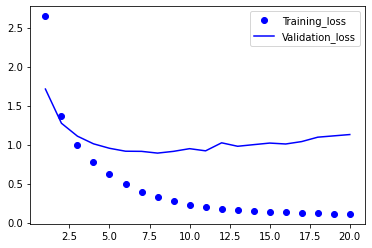

In [66]:
# 3-19 훈련과 검증 손실 그리기
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)


plt.clf()
plt.plot(epochs,loss,'bo',label='Training_loss')
plt.plot(epochs,val_loss,'b',label='Validation_loss')
plt.legend()
plt.show()

In [63]:
history.history

{'accuracy': [0.5493610501289368,
  0.7149837017059326,
  0.7912803888320923,
  0.8393886089324951,
  0.8712102174758911,
  0.8938862681388855,
  0.9168128371238708,
  0.9315961003303528,
  0.9407416582107544,
  0.9477574825286865,
  0.9495114088058472,
  0.9520170092582703,
  0.9537709951400757,
  0.954647958278656,
  0.9565271735191345,
  0.9565271735191345,
  0.9569030404090881,
  0.9569030404090881,
  0.9602856636047363,
  0.957278847694397],
 'loss': [2.644320249557495,
  1.3657629489898682,
  0.9947359561920166,
  0.7771018743515015,
  0.6204296350479126,
  0.4948248863220215,
  0.39646440744400024,
  0.3280211389064789,
  0.2730661928653717,
  0.2258194237947464,
  0.1999233067035675,
  0.17178593575954437,
  0.16244889795780182,
  0.14608079195022583,
  0.13707292079925537,
  0.12952052056789398,
  0.12245472520589828,
  0.11898025125265121,
  0.11427602916955948,
  0.11046121269464493],
 'val_accuracy': [0.6430000066757202,
  0.7269999980926514,
  0.7730000019073486,
  0.79199

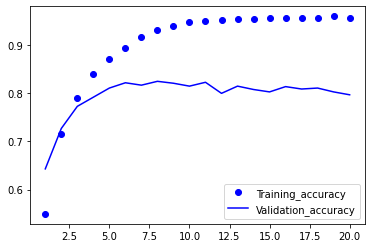

In [65]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']

plt.clf()
plt.plot(epochs,acc,'bo',label='Training_accuracy')
plt.plot(epochs,val_acc,'b',label='Validation_accuracy')
plt.legend()
plt.show()

In [73]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 46ms/step - loss: 2.6170 - accuracy: 0.5124 - val_loss: 1.7083 - val_accuracy: 0.6350
Epoch 2/9
16/16 [==============================] - 1s 49ms/step - loss: 1.3937 - accuracy: 0.7154 - val_loss: 1.2758 - val_accuracy: 0.7280
Epoch 3/9
16/16 [==============================] - 1s 49ms/step - loss: 1.0274 - accuracy: 0.7870 - val_loss: 1.1175 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 1s 50ms/step - loss: 0.8160 - accuracy: 0.8292 - val_loss: 1.0323 - val_accuracy: 0.7800
Epoch 5/9
16/16 [==============================] - 1s 50ms/step - loss: 0.6521 - accuracy: 0.8659 - val_loss: 0.9604 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 1s 51ms/step - loss: 0.5186 - accuracy: 0.8909 - val_loss: 0.9294 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 1s 49ms/step - loss: 0.4222 - accuracy: 0.9139 - val_loss: 0.8996 - val_accuracy: 0.8120
Epoch 8/9
16/16 [===

In [74]:
results

[0.9708588123321533, 0.7911843061447144]

In [76]:
import copy
test_labels_copy = copy.copy(test_label)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_label) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_label)

0.1856634016028495

In [77]:
# 3-22 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

In [78]:
predictions[0].shape

(46,)

In [80]:
np.sum(predictions[0])

0.99999994

In [81]:
np.argmax(predictions[0])

3

### 원핫 인코딩 레이블이 아닌 정수 레이블을 사용하고 싶다면?
- loss : categorical_crossentropy -> sparse_categorical_crossentropy
- label: y_train= np.array(train_labels)

In [83]:
# 3-23 정보 병목이 있는 모델
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val,y_val))

Epoch 1/20
63/63 [==============================] - 1s 20ms/step - loss: 2.5005 - accuracy: 0.5128 - val_loss: 1.7515 - val_accuracy: 0.5740
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 1.5363 - accuracy: 0.6006 - val_loss: 1.4933 - val_accuracy: 0.6050
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.2806 - accuracy: 0.6586 - val_loss: 1.3874 - val_accuracy: 0.6630
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.1135 - accuracy: 0.7181 - val_loss: 1.3667 - val_accuracy: 0.6660
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9869 - accuracy: 0.7558 - val_loss: 1.3463 - val_accuracy: 0.6860
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 0.8877 - accuracy: 0.7829 - val_loss: 1.3085 - val_accuracy: 0.7010
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.8094 - accuracy: 0.7949 - val_loss: 1.3330 - val_accuracy: 0.7070
Epoch 8/20
63

### 비교
- 병목이 있는 모델은 validation에 대한 accuracy가 7~8% 감소했다

# 회귀 문제

In [1]:
# 3-24 보스턴 주택 데이터셋 로드하기
from keras.datasets import boston_housing

(train_data,train_targets),(test_data, test_targets) = boston_housing.load_data()

In [2]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [3]:
# 3-25 데이터 정규화하기
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [4]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [5]:
train_data.shape[1]

13

In [6]:
# 3-26 모델 정의하기
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(13,)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))                      # 스칼라 회귀를 위한 출력층
  model.compile(optimizer='rmsprop', 
                loss='mse',                        # 회귀문제에 주로 쓰이는 손실 함수
                metrics=['mae'])
  return model

In [9]:
# 3-27
# test 데이터가 많지 않기 때문에 어떤 데이터에 따라 결과가 큰 차이를 보일 수 있음 -> K-Fold
import numpy as np

k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores=[]
for i in range(k):
  print('처리중인 폴드 #',i)
  val_data = train_data[i*num_val_samples: (i +1) * num_val_samples]                                        
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(                # k 를 빼놓고 나머지 concat
      [train_data[:i * num_val_samples],
      train_data[(i+1)*num_val_samples:]], axis = 0
      )
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1)*num_val_samples:]], axis = 0
  )

  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs,
            batch_size=1,
            verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [19]:
print(all_scores)
print(np.mean(all_scores))

[2.024306297302246, 2.547109365463257, 2.64969801902771, 2.367769241333008]
2.397220730781555


In [17]:
# 3-28 각 폴드에서 검증 점수를 로그에 저장하기
num_epochs = 500
all_mae_scores = []
for i in range(k):
  print('처리중인 폴드 #', i)
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1) * num_val_samples:]],axis=0)
  partial_train_target = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],axis=0
  )
  model = build_model()
  history = model.fit(partial_train_data,partial_train_target,
            validation_data = (val_data,val_targets),
            epochs=num_epochs,
            batch_size=1,
            verbose=0)
  mae_history = history.history['val_mae']
  all_mae_scores.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [15]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [24]:
# 3-29 k-fold 검증 점수 평균을 기록하기
average_mae_history = [
                       np.mean([x[i] for x in all_mae_scores]) for i in range(num_epochs)]

In [21]:
print(all_mae_scores)
print(np.mean(all_mae_scores))

[[3.877408981323242, 2.6829288005828857, 2.4935553073883057, 2.4810614585876465, 2.370415449142456, 2.2065253257751465, 2.3872368335723877, 2.479100465774536, 2.354835033416748, 2.19999623298645, 2.169692039489746, 2.1345598697662354, 2.172757148742676, 1.9978426694869995, 2.355088472366333, 2.1392734050750732, 2.317859649658203, 2.2015914916992188, 2.0474016666412354, 2.438551902770996, 1.9569041728973389, 2.474086284637451, 2.1295247077941895, 2.271007537841797, 2.2682995796203613, 1.9685596227645874, 2.2005224227905273, 1.9643763303756714, 2.232769727706909, 2.1218268871307373, 1.9493794441223145, 1.9562846422195435, 2.099499225616455, 1.989534854888916, 2.346848726272583, 2.225768566131592, 1.9544103145599365, 2.131868600845337, 1.9594676494598389, 2.2608113288879395, 2.0618791580200195, 2.095273494720459, 2.1402101516723633, 2.27567458152771, 2.0251314640045166, 2.256873369216919, 2.3348944187164307, 2.0323755741119385, 2.11716365814209, 2.0295093059539795, 2.061753034591675, 2.03

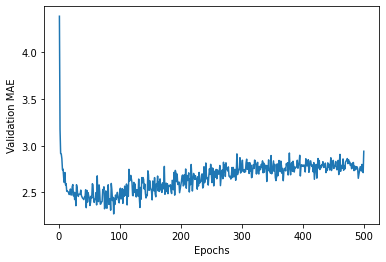

In [25]:
# 3-30 검증 점수 그래프
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# 초반의 데이터와의 편차가 너무 커서 중요한 정보를 보기 편치 않음 - 편차, 편치 라임 ㅅㅌㅊ

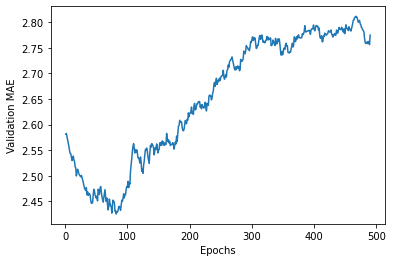

In [29]:
# 3-31 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기
# 지수 이동 평균(exponential moving average) : 시계열 데이터를 부드럽게 만드는데 사용됨
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smoothed_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smoothed_mae_history)+1),smoothed_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Epoch이 80일 때 이후로 MAE가 줄어드는 것이 멈춤, epochs = 80으로 설정한다

In [30]:
# 3-32
model = build_model()
model.fit(train_data, train_targets,
          epochs=80,
          batch_size=16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 20.8957 - mae: 2.9225


In [31]:
test_mae_score

2.922508478164673